In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mdtraj as mdj
import pandas as pd
import nglview as nv
import plumed 


In [3]:
def read_cv(colvars_traj, num=1):
    with open(colvars_traj) as rfile:
        lines = rfile.readlines()

    data = []
    for line in lines:
        words = line.split()
        dline = []
        if words[0].isnumeric():
            dline.append(int(words[0]))
            for i in range(num):
                dline.append(float(words[i+1]))
        
            data.append(dline)

    return np.array(data)

def parseDat(filename):
    """Parse a dat (histogram) file and return the most probable CV value

    Args:
        filename (str): the dat file to be parsed with
        
    Returns:
        float: the most probable CV value
    """
    
    data = np.loadtxt(filename)
    CVs = data[:,0]
    counts = data[:,1]
    
    maxCV = -1
    maxCount = -1
    for i, j in zip(CVs, counts):
        if j > maxCount:
            maxCV = i
            maxCount = j
    return data, maxCV

    

/tmp/ipykernel_2066/2404246260.py:3: UserWarning: cannot load PLUMED instance, conversions will not be available
  plumed_CVs = plumed.read_as_pandas('../../OpenMM_BFEE2/openmm_plumed/000_eq/COLVAR')
+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/home/ndonyapour/miniconda3/envs/bfee2/lib/libplumedKernel.so" +++
+++ File /home/ndonyapour/miniconda3/envs/bfee2/lib/libplumedKernel.so does not exist or cannot be read


center rmsd= 0.41340000000000005 

range rmsd= (-14.5866, 15.4134) 

center eulerTheta= 4.574588 

range eulerTheta= (-10.425412, 19.574588) 

center eulerPhi= -20.244558 

range eulerPhi= (-35.244558, -5.244558000000001) 

center eulerPsi= 13.526335999999997 

range eulerPsi= (-1.473664000000003, 28.526335999999997) 

center polarTheta= 67.557944 

range polarTheta= (52.557944000000006, 82.557944) 

center polarPhi= 60.867876 

range polarPhi= (45.867876, 75.867876) 

center r= 6.6659999999999995 

range r= (-8.334, 21.666) 

center translation= 0.11204 

range translation= (-14.88796, 15.11204) 



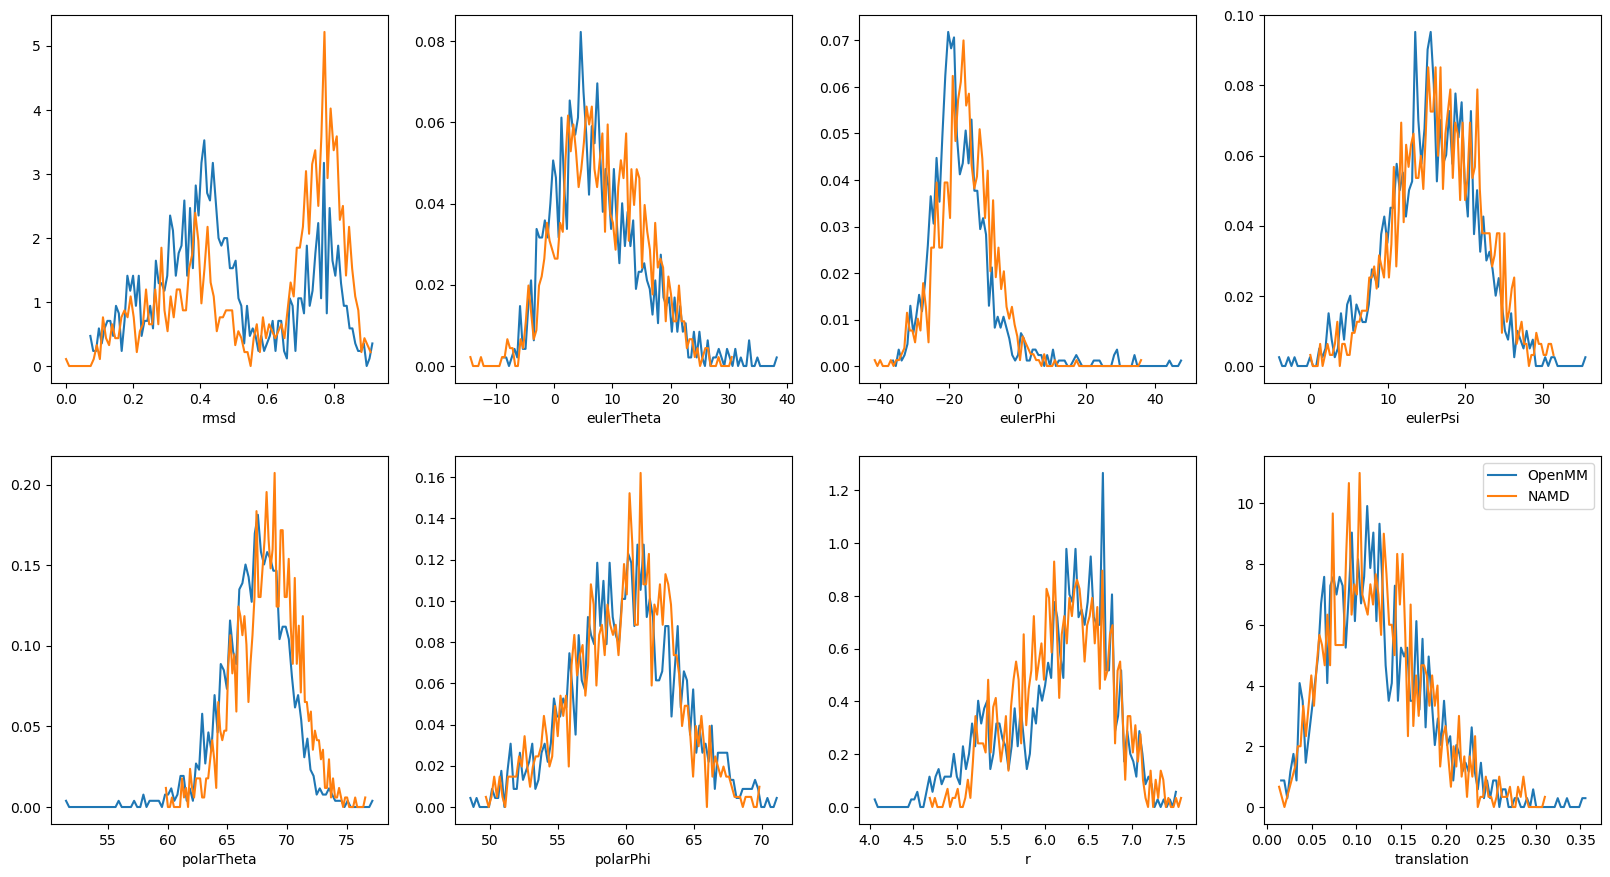

In [5]:
# EQ CVs
colvars_CVs = read_cv('../BFEE_NAMD/000_eq/output/eq.colvars.traj', num=8)
plumed_CVs = plumed.read_as_pandas('../../OpenMM_BFEE2/openmm_plumed/000_eq/COLVAR')

plumed_CVs['rmsd'] *= 10
plumed_CVs['translation'] *= 10
plumed_CVs['r'] *= 10

#openmm_CV_names = list(plumed_CVs.columns[1:])
CV_names = ['rmsd', 'eulerTheta', 'eulerPhi', 'eulerPsi', 'polarTheta', 'polarPhi', 'r', 'translation']
fig, axes = plt.subplots(nrows=2, ncols=4)
fig.set_size_inches(20, 10.5)
axes = axes.flatten()
for idx, cv_name in enumerate(CV_names):
    bins, edges = np.histogram(plumed_CVs[cv_name], bins=100, density=True)
    axes[idx].plot(edges[:-1], bins,  label="OpenMM")
    print(f'center {cv_name}= {edges[np.argmax([bins])]} \n')
    print(f'range {cv_name}= {edges[np.argmax([bins])] -15.00, edges[np.argmax([bins])] + 15.00} \n')
    cv_namd = colvars_CVs[:, idx+1] 
    bins, edges = np.histogram(cv_namd, bins=100, density=True)
    axes[idx].plot(edges[:-1], bins, label="NAMD")
    axes[idx].set_xlabel(cv_name)
    
    
plt.legend(loc='best')
plt.savefig('../analysis/figures/NAMD_OpenMM_cvs_hist.png')